# 1 - Prepare the data <a id='p1'></a>

Original challenge data, as found at https://www.crowdai.org/challenges/lifeclef-2019-bird-recognition.

In [1]:
! tree /home/jul/data/birdclef2019/ -L 2 -I phaunos

/home/jul/data/birdclef2019/
├── custom_subsets
├── train
│   ├── additional_metadata
│   ├── audio
│   ├── BirdCLEF2019_Species_Codes_List.csv
│   ├── metadata
│   └── Pipfile
└── val
    ├── audio
    ├── BirdCLEF2019_Species_Codes_List.csv
    ├── metadata
    ├── Pipfile
    ├── script
    ├── SWAMP_Filename_Description.txt
    ├── SWAMP_Recording_Locations.png
    └── SWIFT_Recording_Unit.jpg

9 directories, 7 files


All additional data is saved in directories called "phaunos".
Audio data is resampled to 22050 Hz for faster prototyping:

In [2]:
! tree /home/jul/data/birdclef2019/train/phaunos/ -L 1 -I annotations
! tree /home/jul/data/birdclef2019/val/phaunos/ -L 1 -I annotations

/home/jul/data/birdclef2019/train/phaunos/
└── audio_wav_22050hz

1 directory, 0 files
/home/jul/data/birdclef2019/val/phaunos/
└── audio_wav_22050hz

1 directory, 0 files


## 1.1 - Generate annotation files (see [here](https://github.com/phaunos/phaunos_ml/blob/7fe9a4d07821a3ae0a5cdc353dc27fd332c5132c/phaunos_ml/utils/annotation_utils.py))

In [3]:
%load_ext autoreload
%autoreload 2
from challenge_utils.birdclef2019_utils import get_class_list, generate_train_ann_files, generate_val_ann_files

In [4]:
class_list = get_class_list('/home/jul/data/birdclef2019/train/BirdCLEF2019_Species_Codes_List.csv')

In [5]:
print(class_list)

['acafly', 'agitit1', 'aldfly', 'amakin1', 'amebit', 'amecro', 'amegfi', 'amekes', 'ameoys', 'amepip', 'amered', 'amerob', 'amewig', 'amewoo', 'amgplo', 'amtspa', 'anbtyr1', 'andeme1', 'andgua1', 'andsis1', 'anhing', 'anpowl1', 'aplfal', 'asctap1', 'azaspi1', 'babtan1', 'babwar', 'babwre1', 'bacant1', 'bacant2', 'bafibi1', 'bahtan1', 'baisan', 'baleag', 'balori', 'banana', 'banswa', 'barant1', 'barpuf1', 'barswa', 'batfal1', 'batgua1', 'batpig1', 'batsee1', 'bawswa1', 'bawwar', 'baymac', 'baywre1', 'bbctyr1', 'bbmtan1', 'bbmtou1', 'bbwduc', 'bcbeag1', 'bcmtan1', 'bcnher', 'belkin1', 'bhtfly1', 'bicant2', 'bicwre1', 'bkbcuc', 'bkbplo', 'bkbwar', 'bkcchi', 'bkcdon', 'bkfgra', 'bkmtou1', 'bknsti', 'bkpwar', 'blaant1', 'blbant1', 'blbcon1', 'blbgra1', 'blbgro2', 'blbthr1', 'blbwre1', 'blcant4', 'blchaw1', 'blchem1', 'blchum1', 'blcjay1', 'blcjay2', 'blcman1', 'blctan2', 'blctit1', 'blctyr1', 'blcwar2', 'blfant1', 'blftan1', 'blgdov1', 'blheag1', 'blhhem1', 'blhpar1', 'blhtan1', 'blkflo1', 

In [6]:
generate_train_ann_files(
    '/home/jul/data/birdclef2019/train/phaunos/audio_wav_22050hz/',
    '/home/jul/data/birdclef2019/train/metadata/',
    '/home/jul/data/birdclef2019/train/phaunos/annotations/',
    class_list)

In [7]:
# Note: some val metadata is empty (no species)
# + some is not clean: wrong time parameters or duplicates
generate_val_ann_files(
    '/home/jul/data/birdclef2019/val/phaunos/audio_wav_22050hz/',
    '/home/jul/data/birdclef2019/val/metadata/',
    '/home/jul/data/birdclef2019/val/phaunos/annotations/',
    class_list)

File /home/jul/data/birdclef2019/val/metadata/./LIFECLEF2017_BIRD_SOUNDSCAPE_WAV_RN49870.json: Wrong time parameters: start_time must be greater than or equal to 0 and end_time must be greater than start_time (got 191 and 2))
File /home/jul/data/birdclef2019/val/metadata/./LIFECLEF2017_BIRD_SOUNDSCAPE_WAV_RN49870.json: Wrong time parameters: start_time must be greater than or equal to 0 and end_time must be greater than start_time (got 191 and 2))
File /home/jul/data/birdclef2019/val/metadata/./LIFECLEF2017_BIRD_SOUNDSCAPE_WAV_RN49888.json: Wrong time parameters: start_time must be greater than or equal to 0 and end_time must be greater than start_time (got 306 and 12))
File /home/jul/data/birdclef2019/val/metadata/./LIFECLEF2017_BIRD_SOUNDSCAPE_WAV_RN49888.json: Wrong time parameters: start_time must be greater than or equal to 0 and end_time must be greater than start_time (got 306 and 12))


Annotation file contains all annotations of a given audio file. Each line represent a region and one or more label ids:
    start_time,end_time(-1 if the annotation is for the whole audio file, as in our case),label_ids (joined by '#'):

In [8]:
!head -5 /home/jul/data/birdclef2019/train/phaunos/annotations/amebit/* | head -8

==> /home/jul/data/birdclef2019/train/phaunos/annotations/amebit/XC1133.ann <==
0.000,-1.000,4

==> /home/jul/data/birdclef2019/train/phaunos/annotations/amebit/XC127371.ann <==
0.000,-1.000,4

==> /home/jul/data/birdclef2019/train/phaunos/annotations/amebit/XC130058.ann <==
0.000,-1.000,4
head: write error: Broken pipe


In [9]:
# Note: metadata is not clean: wrong time parameters or duplicates
!head -5 /home/jul/data/birdclef2019/val/phaunos/annotations/* | head -20

==> /home/jul/data/birdclef2019/val/phaunos/annotations/LIFECLEF2017_BIRD_SOUNDSCAPE_WAV_RN49849.ann <==
7.000,8.000,581
7.000,8.000,581
13.000,15.000,581
13.000,15.000,581
21.000,23.000,581

==> /home/jul/data/birdclef2019/val/phaunos/annotations/LIFECLEF2017_BIRD_SOUNDSCAPE_WAV_RN49870.ann <==
1.000,3.000,81
1.000,3.000,81
2.000,4.000,81
2.000,4.000,81
3.000,5.000,81

==> /home/jul/data/birdclef2019/val/phaunos/annotations/LIFECLEF2017_BIRD_SOUNDSCAPE_WAV_RN49888.ann <==
14.000,16.000,150
14.000,16.000,150
21.000,23.000,150
21.000,23.000,150
23.000,26.000,150
head: write error: Broken pipe


## 1.2 - Create a subset for fast prototyping

In [10]:
import numpy as np
from phaunos_ml.utils.dataset_utils import create_subset, dataset_stat_per_file

In [11]:
# Pick 10 classes randomly
subset_label_set = set(np.random.choice(range(len(class_list)), 10, replace=False))
print(subset_label_set)

{128, 2, 523, 427, 492, 88, 57, 122, 188, 157}


In [12]:
# Create a data subset with all files annotated with at least one of these classes.
subset_filename = create_subset(
    '/home/jul/data/birdclef2019/train/phaunos',
    ['.'],
    '/home/jul/data/birdclef2019/custom_subsets',
    audio_dirname='audio_wav_22050hz',
    label_set=subset_label_set)
print(subset_filename)

/home/jul/data/birdclef2019/custom_subsets/subset_1563971973/subset_1563971973.csv


This basically create a file with a unique name (*subset_&lt;timestamp&gt;.csv*) containing a list of files with their annotations (intersecting with label_set):

In [13]:
!head -10 "$subset_filename"

#class subset: 2,57,88,122,128,157,188,427,492,523
audio_wav_22050hz/chiswi/XC101442.wav,157
audio_wav_22050hz/chiswi/XC302268.wav,157
audio_wav_22050hz/chiswi/XC87685.wav,157
audio_wav_22050hz/chiswi/XC320177.wav,157
audio_wav_22050hz/chiswi/XC53395.wav,157
audio_wav_22050hz/chiswi/XC316342.wav,157
audio_wav_22050hz/chiswi/XC52369.wav,157
audio_wav_22050hz/chiswi/XC392955.wav,157
audio_wav_22050hz/chiswi/XC1369.wav,157


In [14]:
# Show dataset stats
# Note: The total number of instances might be higher than the number of audio files because a file might have multiple labels
d_num, d_dur = dataset_stat_per_file('/home/jul/data/birdclef2019/train/phaunos', subset_filename)
print("Class index, number of files, total duration (in s)") 
for k, v in sorted(d_num.items()): 
    print(f' {k:<10},{v:<10},{d_dur[k]:<10.3f}')

778it [00:53, 14.60it/s]

Class index, number of files, total duration (in s)
 2         ,100       ,4577.689  
 57        ,70        ,2484.778  
 88        ,100       ,2872.221  
 122       ,80        ,3618.001  
 128       ,100       ,2784.315  
 157       ,36        ,1526.681  
 188       ,48        ,4017.021  
 427       ,100       ,3171.147  
 492       ,44        ,1398.714  
 523       ,100       ,5571.255  


## 1.3 - Compute features and write them to [TFRecord](https://www.tensorflow.org/tutorials/load_data/tf_records) files

In [15]:
import os
from phaunos_ml.utils.feature_utils import MelSpecExtractor
from phaunos_ml.utils.dataset_utils import dataset2tfrecords
import tensorflow as tf

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.InteractiveSession(config=config)

In [16]:
# Log-mel spectrogram in 2s examples
feature_extractor = MelSpecExtractor(n_fft=512,
                                     hop_length=128,
                                     n_mels = 128,
                                     example_duration=2,
                                     example_hop_duration=1)

In [17]:
# Process our subset. TFRecords are written in 
tfrecord_path = os.path.join(os.path.dirname(subset_filename), 'features')
dataset2tfrecords('/home/jul/data/birdclef2019/train/phaunos',
                 subset_filename,
                 tfrecord_path,
                 feature_extractor,
                 audio_dirname='audio_wav_22050hz')

100%|██████████| 779/779 [05:32<00:00,  3.86it/s]


## 1.4 - Check some TFRecord

In [18]:
import random
import tensorflow as tf
from phaunos_ml.utils import tf_utils
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
subset_dir = os.path.dirname(subset_filename)
sometfrecord_path = os.path.join(
    os.path.join(subset_dir, 'features/audio_wav_22050hz/'),
    next(os.walk(os.path.join(subset_dir, 'features/audio_wav_22050hz/')))[1][0]
)

In [20]:
sometfrecord = os.path.join(
    sometfrecord_path,
    random.sample(os.listdir(sometfrecord_path), 1)[0]
)

In [21]:
print(sometfrecord)

/home/jul/data/birdclef2019/custom_subsets/subset_1563971973/features/audio_wav_22050hz/chiswi/XC190572.tf


In [22]:
someexamples = tf_utils.tfrecord2example(sometfrecord, feature_extractor)
print(someexamples)

W0724 14:46:02.217186 140063917418304 deprecation.py:323] From /home/jul/.miniconda3/envs/datest/lib/python3.6/site-packages/phaunos_ml/utils/tf_utils.py:44: DatasetV1.make_one_shot_iterator (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.
W0724 14:46:02.225850 140063917418304 deprecation_wrapper.py:119] From /home/jul/.miniconda3/envs/datest/lib/python3.6/site-packages/phaunos_ml/utils/tf_utils.py:51: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



[{'data': array([[-18.420681 , -18.42062  , -18.410795 , ...,  -9.268562 ,
         -9.795207 , -13.585888 ],
       [-18.420681 , -18.420637 , -18.413448 , ...,  -9.582206 ,
        -10.108824 , -13.8966465],
       [-18.420681 , -18.420595 , -18.416399 , ...,  -7.43113  ,
         -8.485489 ,  -9.313375 ],
       ...,
       [-18.420681 , -18.420675 , -18.419264 , ..., -13.72322  ,
        -14.906199 , -15.287282 ],
       [-18.420681 , -18.42066  , -18.415062 , ..., -14.31129  ,
        -14.734269 , -15.881575 ],
       [-18.420681 , -18.420635 , -18.409952 , ..., -15.656061 ,
        -15.380434 , -16.373186 ]], dtype=float32), 'filename': b'audio_wav_22050hz/chiswi/XC190572.tf', 'labels': b'157', 'times': array([0.      , 1.996916], dtype=float32)}, {'data': array([[-12.706348 , -11.651565 , -11.247909 , ..., -11.776838 ,
        -12.95904  , -11.7722025],
       [-13.018816 , -11.964824 , -11.561309 , ..., -12.090041 ,
        -13.271158 , -12.085408 ],
       [-11.586895 , -12.37

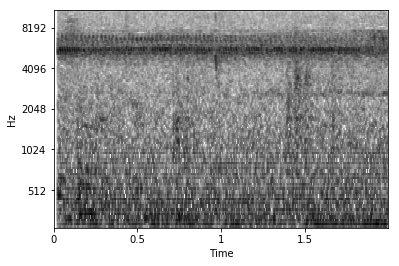

In [23]:
# First example (0->2s) in the TFRecord
feature_extractor.plot(someexamples[0]['data'])

## 1.5 - Check some other TFRecord

In [24]:
someothertfrecord = os.path.join(
    sometfrecord_path,
    random.sample(os.listdir(sometfrecord_path), 1)[0]
)
print(someothertfrecord)

/home/jul/data/birdclef2019/custom_subsets/subset_1563971973/features/audio_wav_22050hz/chiswi/XC149418.tf


### As examples

In [25]:
otherexamples = tf_utils.tfrecord2example(someothertfrecord, feature_extractor)

In [26]:
print(otherexamples)

[{'data': array([[-18.420681, -18.420681, -18.420681, ..., -18.400196, -18.393885,
        -18.387375],
       [-18.420681, -18.420681, -18.420681, ..., -18.40567 , -18.40103 ,
        -18.396233],
       [-18.420681, -18.420681, -18.420681, ..., -18.383224, -18.385147,
        -18.348272],
       ...,
       [-18.420681, -18.420681, -18.420681, ..., -11.516572, -10.751059,
        -11.201848],
       [-18.420681, -18.420681, -18.420681, ..., -12.547349, -11.30747 ,
        -11.645879],
       [-18.420681, -18.420681, -18.420681, ..., -13.734666, -15.544166,
        -14.954393]], dtype=float32), 'filename': b'audio_wav_22050hz/chiswi/XC149418.tf', 'labels': b'157', 'times': array([0.      , 1.996916], dtype=float32)}, {'data': array([[-18.31054 , -18.382893, -18.41847 , ..., -18.383636, -18.399693,
        -18.306273],
       [-18.339022, -18.392927, -18.419065, ..., -18.393476, -18.4053  ,
        -18.335812],
       [-18.377598, -18.415201, -18.38178 , ..., -18.268633, -18.23469 ,
  

### As input (features + one-hot encoded labels) to the model

In [27]:
subset_class_list = sorted(list(subset_label_set)) # labels are one-hot encoded according to this list

In [28]:
print(subset_class_list)

[2, 57, 88, 122, 128, 157, 188, 427, 492, 523]


In [29]:
example_as_input = tf_utils.tfrecord2data(someothertfrecord, feature_extractor, subset_class_list)

W0724 14:46:03.140001 140063917418304 deprecation.py:323] From /home/jul/.miniconda3/envs/datest/lib/python3.6/site-packages/phaunos_ml/utils/tf_utils.py:143: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [30]:
# model_input is a list of tuple (<features>, <one-hot encoded labels>)
print(example_as_input)

[(array([[[-18.420681, -18.420681, -18.420681, ..., -18.400196,
         -18.393885, -18.387375],
        [-18.420681, -18.420681, -18.420681, ..., -18.40567 ,
         -18.40103 , -18.396233],
        [-18.420681, -18.420681, -18.420681, ..., -18.383224,
         -18.385147, -18.348272],
        ...,
        [-18.420681, -18.420681, -18.420681, ..., -11.516572,
         -10.751059, -11.201848],
        [-18.420681, -18.420681, -18.420681, ..., -12.547349,
         -11.30747 , -11.645879],
        [-18.420681, -18.420681, -18.420681, ..., -13.734666,
         -15.544166, -14.954393]]], dtype=float32), array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)), (array([[[-18.31054 , -18.382893, -18.41847 , ..., -18.383636,
         -18.399693, -18.306273],
        [-18.339022, -18.392927, -18.419065, ..., -18.393476,
         -18.4053  , -18.335812],
        [-18.377598, -18.415201, -18.38178 , ..., -18.268633,
         -18.23469 , -18.275372],
        ...,
        [-14.06916 , -14

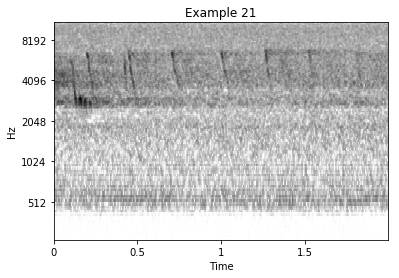

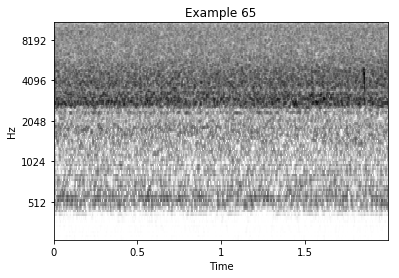

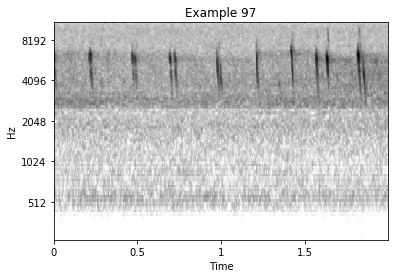

In [31]:
# Plot features for random examples from the selected file
ind = sorted(random.sample(range(len(example_as_input)),min(len(example_as_input), 3)))
for i in ind:    
    plt.figure()
    feature_extractor.plot(example_as_input[i][0][0])
    plt.title(f'Example {i}')

# 2 - Training

## 2.1 - Generate a train/valid split to monitor the performance on unseen data

In [32]:
from phaunos_ml.utils.dataset_utils import split_dataset

In [33]:
# This generates 2 files,
# /subset/path/subset_name.train.csv containing 80% of the data (training dataset)
# /subset/path/subset_name.test.csv containing 20% of the data (validation dataset, to select the model)
split_dataset(subset_filename, test_size=0.2)

/home/jul/data/birdclef2019/custom_subsets/subset_1563971973/subset_1563971973.train.csv written
/home/jul/data/birdclef2019/custom_subsets/subset_1563971973/subset_1563971973.test.csv written


In [34]:
subset_filename

'/home/jul/data/birdclef2019/custom_subsets/subset_1563971973/subset_1563971973.csv'

## 2.2 - Count the number of batches in the train and valid sets

In [35]:
from phaunos_ml.utils.dataset_utils import dataset_stat_per_example
BATCH_SIZE = 32

In [36]:
# training set
n_train_batches, n_train_examples_per_class = dataset_stat_per_example(
    subset_filename.replace('.csv', '.train.csv'),
    os.path.join(os.path.dirname(subset_filename), 'features'),
    feature_extractor.feature_shape,
    subset_class_list,
    batch_size=BATCH_SIZE)
print(f'Num training batches: {n_train_batches} (i.e. {n_train_batches * BATCH_SIZE} examples)')
for c, n in zip(subset_class_list, n_train_examples_per_class):
    print(f'Class {c:2}: {n} examples')

Num training batches: 800 (i.e. 25600 examples)
Class  2: 3923 examples
Class 57: 1922 examples
Class 88: 2360 examples
Class 122: 2859 examples
Class 128: 2113 examples
Class 157: 1203 examples
Class 188: 3509 examples
Class 427: 2477 examples
Class 492: 1159 examples
Class 523: 4075 examples


In [37]:
# valid set
n_valid_batches, n_valid_examples_per_class = dataset_stat_per_example(
    subset_filename.replace('.csv', '.test.csv'),
    os.path.join(os.path.dirname(subset_filename), 'features'),
    feature_extractor.feature_shape,
    subset_class_list,
    batch_size=BATCH_SIZE)
print(f'Num valid batches: {n_valid_batches} (i.e. {n_valid_batches * BATCH_SIZE} examples)')
for c, n in zip(subset_class_list, n_valid_examples_per_class):
    print(f'Class {c:2}: {n} examples')

Num valid batches: 189 (i.e. 6048 examples)
Class  2: 612 examples
Class 57: 532 examples
Class 88: 455 examples
Class 122: 726 examples
Class 128: 625 examples
Class 157: 309 examples
Class 188: 483 examples
Class 427: 652 examples
Class 492: 212 examples
Class 523: 1442 examples


## 2.3 - Write feature extraction and training config files

In [38]:
import json
import pathlib

EPOCHS = 10

In [39]:
# Write feature extractor's config file
feature_extractor.config2file(os.path.join(subset_dir, 'features', 'featex_config.json'))

In [40]:
# Write training config file

training_dir = os.path.join(subset_dir, 'training')

training_config = {}
training_config['feature_path'] = os.path.join(subset_dir, 'features')
training_config['train_set_file'] = subset_filename.replace('.csv', '.train.csv')
training_config['n_train_batches'] = n_train_batches
training_config['batch_size'] = BATCH_SIZE
training_config['multilabel'] = False
training_config['epochs'] = EPOCHS
training_config['metrics'] = 'accuracy'
training_config['out_dir'] = training_dir
training_config['valid_set_file'] = subset_filename.replace('.csv', '.test.csv')
training_config['n_valid_batches'] = n_valid_batches

training_config_path = os.path.join(training_dir, 'training_config.json')
pathlib.Path(training_dir).mkdir(parents=True, exist_ok=True)

with open(training_config_path, 'w') as training_config_file:
    json.dump(training_config, training_config_file)

## 2.4 - Train

In [41]:
from phaunos_ml import train

In [42]:
train.process(training_config_path)

W0724 14:46:31.963994 140063917418304 deprecation.py:506] From /home/jul/.miniconda3/envs/datest/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mels (InputLayer)            [(32, 1, 128, 344)]       0         
_________________________________________________________________
l1_conv (Conv2D)             (32, 32, 126, 342)        288       
_________________________________________________________________
l1_bn (BatchNormalization)   (32, 32, 126, 342)        96        
_________________________________________________________________
l1 (Activation)              (32, 32, 126, 342)        0         
_________________________________________________________________
l1_mp (MaxPooling2D)         (32, 32, 62, 170)         0         
_________________________________________________________________
l2_conv (Conv2D)             (32, 32, 58, 166)         25600     
_________________________________________________________________
l2_bn (BatchNormalization)   (32, 32, 58, 166)         96    